In [333]:
import pandas as pd
from vega_datasets import data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [2]:
temp = data.sf_temps()

In [3]:
temp.index = pd.to_datetime(temp.date)

In [4]:
temp.head()

,temp,date
date,,
2010-01-01 00:00:00,47.8,2010-01-01 00:00:00
2010-01-01 01:00:00,47.4,2010-01-01 01:00:00
2010-01-01 02:00:00,46.9,2010-01-01 02:00:00
2010-01-01 03:00:00,46.5,2010-01-01 03:00:00
2010-01-01 04:00:00,46.0,2010-01-01 04:00:00


### Average temp

Text(0.5, 1.0, 'Average Daily Temperature')

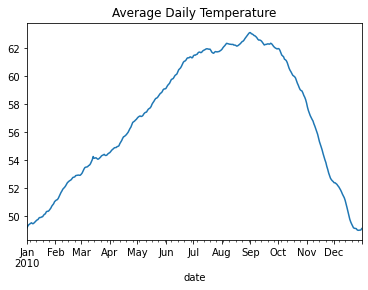

In [5]:
temp.resample('D').temp.mean().plot()
plt.title("Average Daily Temperature")

### Min temp

Text(0.5, 1.0, 'Daily Minimum Temperature')

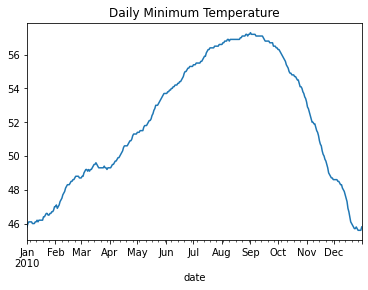

In [6]:
temp.resample('D').temp.min().plot()
plt.title("Daily Minimum Temperature")

### Max temp

Text(0.5, 1.0, 'Daily Max Temperature')

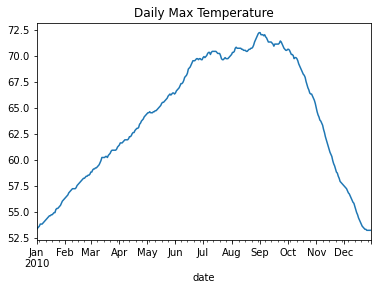

In [7]:
temp.resample('D').temp.max().plot()
plt.title("Daily Max Temperature")

### Coldest / hottest average month

In [358]:
temp.resample('M').temp.mean().idxmin().month_name()

'January'

In [360]:
temp.resample('M').temp.mean().idxmax().month_name()

'September'

### Resample by the day and calculate min and max temp for the day. Calculate change in temperature for the day. Which month has highest daily temp variability.

In [367]:
temp.resample('D').temp.agg(
    ['min','max']).assign(
    temp_range = lambda row: row['max']-row['min']).resample('M').temp_range.mean().idxmax().month_name()

'September'

Text(0.5, 1.0, 'Daily Min, Mean, and Max Temperature')

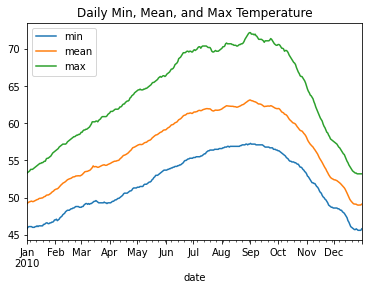

In [11]:
temp.resample('D').temp.agg(
    ['min','mean','max']).plot()
plt.title("Daily Min, Mean, and Max Temperature")

# Seattle weather

In [368]:
# Helpful for sorting by month of year and day of week
# df.index.strftime('%m-%b')
# df.index.strftime('%w-%a')

In [12]:
seattle = data.seattle_weather()

In [13]:
seattle.index = pd.to_datetime(seattle.date)
seattle = seattle.sort_index()

In [14]:
print("Greatest precipitation was in :",seattle.groupby([seattle.index.year, seattle.index.month]).precipitation.sum().idxmax())

Greatest precipitation was in : (2015, 12)


Text(0.5, 1.0, 'Monthly Precipitation')

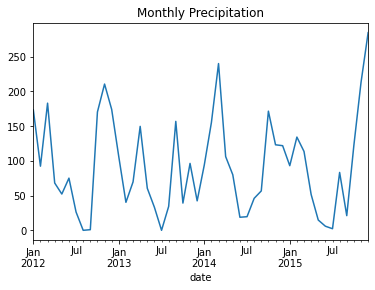

In [372]:
seattle.resample('M').precipitation.sum().plot()
plt.title('Monthly Precipitation')

Text(0.5, 1.0, 'Monthly Average Wind')

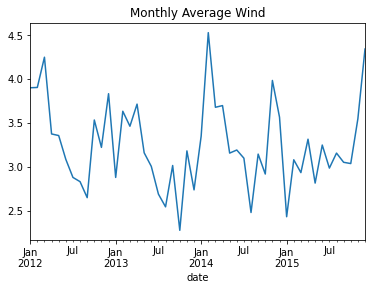

In [16]:
seattle.resample('M').wind.mean().plot()
plt.title('Monthly Average Wind')

In [17]:
print("The windiest month was " , seattle.resample('M').wind.mean().idxmax().strftime('%b-%Y'))

The windiest month was  Feb-2014


In [18]:
print("The sunniest year was",(seattle.weather=='sun').resample('Y').sum().idxmax().year)

The sunniest year was 2014


In [19]:
print("The rainiest month on average is",(seattle.weather=='rain').resample('M').sum().idxmax().month_name())

The rainiest month on average is November


In [373]:
print("The month with the most days of non-zero precipitation is",(seattle.precipitation>0).resample('M').sum().idxmax().month_name())

The month with the most days of non-zero precipitation is December


# Flights

In [21]:
flights = data.flights_20k()

In [22]:
flights.index = pd.to_datetime(flights.date)
flights = flights.sort_index()

In [23]:
flights.delay = np.where(flights.delay<0, 0, flights.delay)

In [24]:
print(f"Hour with highest average delay: {flights.groupby([flights.index.hour]).delay.mean().idxmax()}")

Hour with highest average delay: 3


Text(0.5, 1.0, "Average Delay by Day: Don't fly on Fridays!")

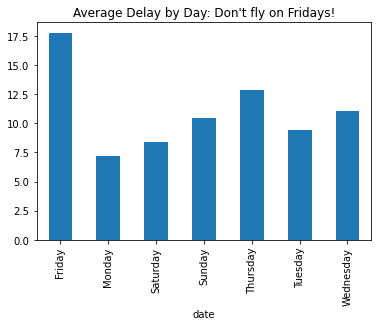

In [25]:
flights.groupby([flights.index.day_name()]).delay.mean().plot.bar()
plt.title("Average Delay by Day: Don't fly on Fridays!")

Text(0.5, 1.0, 'Average Delay by Month: February has Worse Delays on Average')

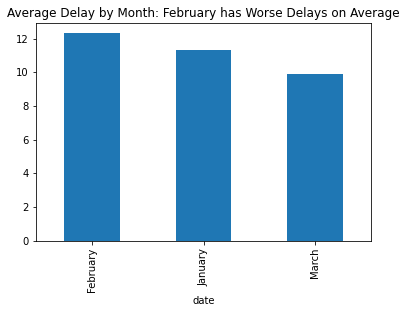

In [147]:
flights.groupby([flights.index.month_name()]).delay.mean().plot.bar()
plt.title("Average Delay by Month: February has Worse Delays on Average")

In [86]:
e = data.iowa_electricity()

In [87]:
e.index = pd.to_datetime(e.year)

In [88]:
e = e.sort_index()

In [89]:
e.head()

,year,source,net_generation
year,,,
2001-01-01,2001-01-01,Fossil Fuels,35361
2001-01-01,2001-01-01,Nuclear Energy,3853
2001-01-01,2001-01-01,Renewables,1437
2002-01-01,2002-01-01,Fossil Fuels,35991
2002-01-01,2002-01-01,Nuclear Energy,4574


In [90]:
def get_years_net_gen(row):
    
    total_gen_year = e[e.index.year == row.name.year].net_generation.sum()
    
    return 100*round(row.net_generation/total_gen_year,3)
    
    

In [91]:
e["percent_of_yearly_gen"] = e.apply(lambda row: get_years_net_gen(row), axis=1)

In [94]:
e.head()

,year,source,net_generation,percent_of_yearly_gen
year,,,,
2001-01-01,2001-01-01,Fossil Fuels,35361,87.0
2001-01-01,2001-01-01,Nuclear Energy,3853,9.5
2001-01-01,2001-01-01,Renewables,1437,3.5
2002-01-01,2002-01-01,Fossil Fuels,35991,84.6
2002-01-01,2002-01-01,Nuclear Energy,4574,10.8


<AxesSubplot:xlabel='year', ylabel='net_generation'>

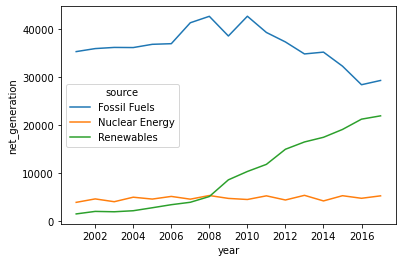

In [109]:
sns.lineplot(data = e.reset_index(drop=True), x='year', y = 'net_generation', hue = 'source')

In [112]:
e.reset_index(drop=True).pivot_table(index='source',columns='year',values='net_generation')

year,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


<AxesSubplot:xlabel='year'>

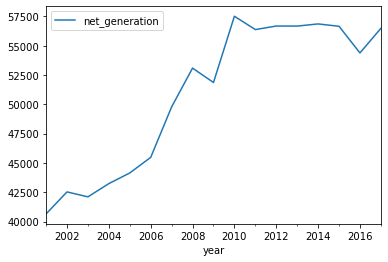

In [119]:
e.reset_index(drop=True).pivot_table(aggfunc='sum',columns='year',values='net_generation').T.plot()

## Total generation increased from 2002 to 2010 but then leveled out

<AxesSubplot:xlabel='year', ylabel='percent_of_yearly_gen'>

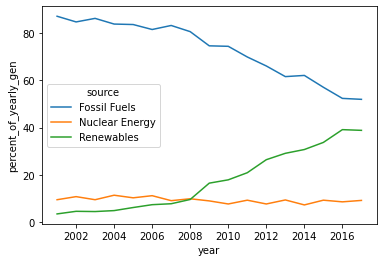

In [121]:
sns.lineplot(data = e.reset_index(drop=True), x='year', y = 'percent_of_yearly_gen', hue = 'source')

### SF TEMPS

In [122]:
df = data('sf_temps')

In [127]:
df["temp_bin"]=pd.qcut(df.temp, 4,labels=['cold','cool','warm','hot'])

In [129]:
df.temp_bin.value_counts()

cool    2218
cold    2210
hot     2175
warm    2156
Name: temp_bin, dtype: int64

In [135]:
df.index = pd.to_datetime(df.date)
df.index.name = ""

In [138]:
df.head()

,temp,date,temp_bin
,,,
2010-01-01 00:00:00,47.8,2010-01-01 00:00:00,cold
2010-01-01 01:00:00,47.4,2010-01-01 01:00:00,cold
2010-01-01 02:00:00,46.9,2010-01-01 02:00:00,cold
2010-01-01 03:00:00,46.5,2010-01-01 03:00:00,cold
2010-01-01 04:00:00,46.0,2010-01-01 04:00:00,cold


In [327]:
count_df = (df.groupby([df.index.month_name(),df.temp_bin]).temp_bin.count()).unstack()


In [330]:
count_df["month"]=count_df.index

In [343]:
count_df["month_num"]=count_df.apply(lambda row: datetime.strptime(row.month, '%B').month, axis=1)

In [345]:
count_df = count_df.sort_values('month_num')

Text(0, 0.5, 'Occurences in Month')

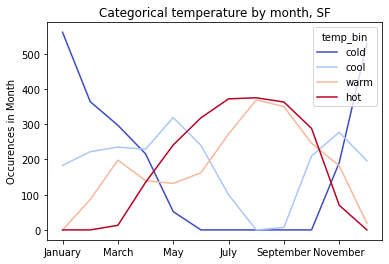

In [354]:
count_df[['cold','cool','warm','hot']].plot(cmap=plt.cm.coolwarm)
plt.title("Categorical temperature by month, SF")
plt.ylabel("Occurences in Month")